# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
import os

data_path = "/data/landmark_images/"

train_path = os.path.join(data_path, "train/")
test_path = os.path.join(data_path, "test/")

In [2]:
class_number_train = list(map(lambda path: path[3:], os.listdir(train_path)))
class_number_test = list(map(lambda path: path[3:], os.listdir(test_path)))
diff_classes = (set(class_number_train).difference(class_number_test))

print("TRAIN: (CLASSES_ON_FOLDER, UNIQUE_CLASSES)", len(class_number_train), len(set(class_number_train)))
print("TEST:  (CLASSES_ON_FOLDER, UNIQUE_CLASSES)", len(class_number_test), len(set(class_number_test)))
print("DIFF CLASSES BETWEEN TRAIN AND TEST: ", len(diff_classes))

TRAIN: (CLASSES_ON_FOLDER, UNIQUE_CLASSES) 50 50
TEST:  (CLASSES_ON_FOLDER, UNIQUE_CLASSES) 50 50
DIFF CLASSES BETWEEN TRAIN AND TEST:  0


In [7]:
"   ".join(class_number_train)

'Temple_of_Olympian_Zeus   Mount_Rainier_National_Park   Moscow_Raceway   Gullfoss_Falls   Eiffel_Tower   Niagara_Falls   Kantanagar_Temple   Delicate_Arch   Ljubljana_Castle   Pont_du_Gard   Temple_of_Heaven   Stonehenge   Central_Park   Externsteine   Sydney_Opera_House   Soreq_Cave   Forth_Bridge   Great_Wall_of_China   Matterhorn   Grand_Canyon   Monumento_a_la_Revolucion   Edinburgh_Castle   London_Olympic_Stadium   Mount_Rushmore_National_Memorial   Machu_Picchu   Haleakala_National_Park   Whitby_Abbey   Gateway_of_India   Stockholm_City_Hall   Vienna_City_Hall   Changdeokgung   Brooklyn_Bridge   Prague_Astronomical_Clock   Atomium   Golden_Gate_Bridge   Great_Barrier_Reef   Sydney_Harbour_Bridge   Washington_Monument   Dead_Sea   Wroclaws_Dwarves   Trevi_Fountain   Petronas_Towers   Hanging_Temple   Death_Valley_National_Park   Seattle_Japanese_Garden   Yellowstone_National_Park   Banff_National_Park   Taj_Mahal   Badlands_National_Park   Terminal_Tower'

**50 classes in folders for 50 unique classes, i.e. no repeated folders (and `diff_classes` indicates that there are the same classes in train & test)**

# Analyze the data

In [8]:
from PIL import Image
import numpy as np

def get_img_size_mean(img_sizes):
    return np.floor(
        np.matrix(img_sizes).mean(axis=0)
    ).tolist()[0]

def get_folder_info(img_dir):
    paths_dir = os.listdir(img_dir) # all classes
    data = list()
    
    for path in paths_dir: # for each class
        class_path = os.path.join(img_dir, path + "/")
        imgs = os.listdir(class_path)
        
        img_sizes = []
        for root, _, paths in os.walk(class_path):
            img_sizes.extend([Image.open(os.path.join(root, img)).size for img in paths])
        
        img_size_x, img_size_y = get_img_size_mean(img_sizes)
        data.append({"class": path[3:],
                          "len_img": len(imgs),
                          "img_sizes": list(set(img_sizes)), 
                          "mean_img_size_x": img_size_x,
                          "mean_img_size_y": img_size_y}
                   )
            
    return data

train_data_dict = get_folder_info(train_path)
test_data_dict = get_folder_info(test_path)

In [9]:
import pandas as pd

train_df = pd.DataFrame(train_data_dict).drop(columns=["img_sizes"])
test_df = pd.DataFrame(test_data_dict).drop(columns=["img_sizes"])

train_df.head()

,class,len_img,mean_img_size_x,mean_img_size_y
0,Temple_of_Olympian_Zeus,96,739.0,591.0
1,Mount_Rainier_National_Park,100,755.0,594.0
2,Moscow_Raceway,100,789.0,530.0
3,Gullfoss_Falls,100,765.0,571.0
4,Eiffel_Tower,100,721.0,618.0


In [10]:
mean_img_sizes_train = train_df["mean_img_size_x"].mean(), train_df["mean_img_size_y"].mean()
np.floor(mean_img_sizes_train)

array([ 752.,  586.])

In [11]:
mean_img_sizes_test = test_df["mean_img_size_x"].mean(), test_df["mean_img_size_y"].mean()
np.floor(mean_img_sizes_test)

array([ 749.,  586.])

# Load data

In [12]:
"""  REFERENCE
https://discuss.pytorch.org/t/about-normalization-using-pre-trained-vgg16-networks/23560
"""

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

def get_mean_std(path, batch_size, transform=None):
    if transform is None:
        transform = transforms.Compose([
            transforms.Resize((600,600)),
            transforms.ToTensor()
        ])
        
    dataset = datasets.ImageFolder(path, transform=transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    mean, std = 0.0, 0.0
    for data in loader:
        batch_samples = data[0].size(0)
        mean += data[0].mean(0)
        std += data[0].std(0)

    mean = (mean/len(loader)).mean().sum()
    std = (std/len(loader)).mean().sum()
    
    return mean.repeat(3), std.repeat(3)

In [30]:
transfs_train = transforms.Compose([
    transforms.RandomResizedCrop(600),
    transforms.RandomRotation(degrees=(5, 15)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

train_mean_std = get_mean_std(train_path, 32, transform=transfs_train)
transfs_train = None
train_mean_std

# returns: (tensor([ 0.4313,  0.4313,  0.4313]), tensor([ 0.2634,  0.2634,  0.2634]))

(tensor([ 0.4313,  0.4313,  0.4313]), tensor([ 0.2634,  0.2634,  0.2634]))

In [26]:
test_mean_std = get_mean_std(test_path, 32)
test_mean_std

# returns: (tensor([ 0.4730,  0.4730,  0.4730]), tensor([ 0.2609,  0.2609,  0.2609]))

(tensor([ 0.4730,  0.4730,  0.4730]), tensor([ 0.2609,  0.2609,  0.2609]))

In [13]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

from torch.utils.data.sampler import SubsetRandomSampler

#  parameters
N_WORKERS = 0
BATCH_SIZE = 32
VALID_SIZE = .2


#  data transforms
train_transforms = transforms.Compose([
    transforms.Resize((600, 600)),
    transforms.RandomRotation(degrees=(5, 15)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4313, 0.4313, 0.4313), (0.2634, 0.2634, 0.2634))
])

test_transforms = transforms.Compose([
    transforms.Resize((600, 600)),
    transforms.ToTensor(),
    transforms.Normalize((0.4730, 0.4730, 0.4730), (0.2609, 0.2609, 0.2609))
])


#  datasets
train_dataset = datasets.ImageFolder(train_path, transform=train_transforms)
test_dataset = datasets.ImageFolder(test_path, transform=test_transforms)


#  split indices
indices = list(range(len(train_dataset)))
np.random.shuffle(indices)
split = np.floor(VALID_SIZE * len(train_dataset)).astype(int)
train_split, valid_split = indices[split:], indices[:split]


#  samplers
train_sampler = SubsetRandomSampler(train_split)
valid_sampler = SubsetRandomSampler(valid_split)


#  loaders
train_loader = DataLoader(train_dataset, sampler=train_sampler, 
                          batch_size=BATCH_SIZE, num_workers=N_WORKERS)

valid_loader = DataLoader(train_dataset, sampler=valid_sampler,
                          batch_size=BATCH_SIZE, num_workers=N_WORKERS)

test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                         num_workers=N_WORKERS, shuffle=True)

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: *Analyzing the average size of the images present in the dataset, I noticed that they are, on average, 750x586. Thus, the ideal value to keep the image square and without much distortion was 600x600. The images were resized by stretching because removing approximately 150px in height could suppress some important feature of the image.*

*To increase the variability in the data, I decided to apply augmentations to the images. These transformations were (for the training set) stretching (600x600), random rotations between 5 and 15 degrees, horizontal flip, conversion to tensor and normalization. For the test set I performed only transformations to correspond with the dimensions of the images in the training set, conversion to tensor and normalization.*

*In general, the loaders were fed with batches of 32 images, and 20% of the training set was removed to constitute the validation set.*

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

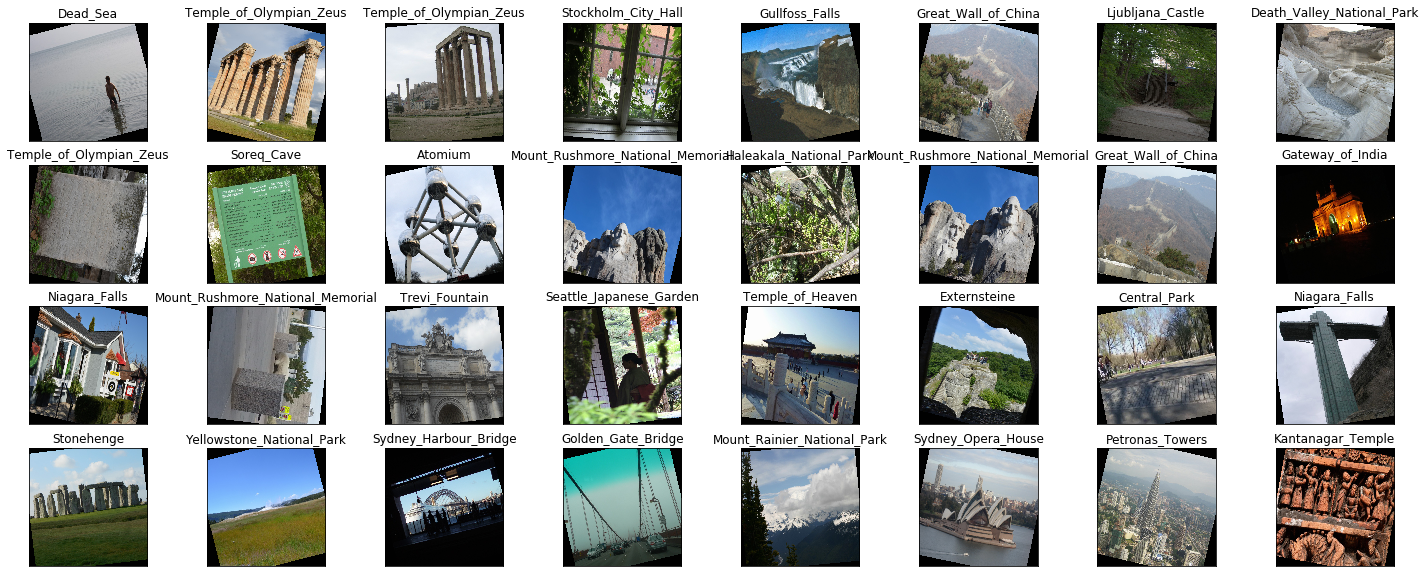

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader
## The class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

""" REFERENCES
https://discuss.pytorch.org/t/simple-way-to-inverse-transform-normalization/4821/6

denormalize ->    (z - (-mean/std)) / (1/std)
"""
denormalize = lambda img: (img - (-0.4313/0.2609)) / (1/0.2609)

def show_img(img):
    img = denormalize(img)
    plt.imshow(np.transpose(img, (1, 2, 0)))

CLASSES = train_dataset.classes

#  one batch of training images
images, labels = next(iter(train_loader))
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 10))

# display 20 images
for idx in np.arange(BATCH_SIZE):
    ax = fig.add_subplot(4, BATCH_SIZE/4, idx+1, xticks=[], yticks=[])
    show_img(images[idx])
    ax.set_title(CLASSES[labels[idx]][3:])

### Initialize use_cuda variable

In [15]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [16]:
from torch import optim
import torch.nn as nn

## TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()
LR = 1e-4

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    optimizer = optim.Adam(model.parameters(), lr=LR)
    return optimizer
    
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [17]:
# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(3, 3), # 600x600x3 -> 200x200x16
            
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # 200x200x16 -> 100x100x32
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # 100x100x32 -> 50x50x64
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(5, 5), # 50x50x64 -> 10x10x128
            
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2) # 10x10x128 -> 5x5x128
        )

        self.classifier = nn.Sequential(
            nn.Linear(128 * 5 * 5, 512),
            nn.ReLU(),
            nn.Dropout(.3),
            
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(.2),
            
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(.2),
            
            nn.Linear(64, len(CLASSES))
        )
        
    
    def forward(self, x):
        ## Define forward behavior
        
        x = self.features(x)
        x = x.view(-1, 128 * 5 * 5)
        x = self.classifier(x)
        
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [18]:
model_scratch

Net(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=3200, out_features=512, bia

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  *The model created corresponds to a simple CNN. The first step is defining and extracting features and consists of 5 convolutional blocks with out channels ranging from 2^4 to 2^7, all with `kernel_size=3` and `padding=1`. All blocks were activated with ReLU and have Max Poolings to reduce the dimensions of feature maps.*

*After this process the data are flattened and sent to the classifier.*

*The classifier has 4 fully connected layers: the first three with ReLU and Dropout (30%, 20% and 20% respectively). Dropout layers are to prevent overfit*

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [19]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            train_loss += ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 
            output = model(data)
            loss = criterion(output, target)

            valid_loss += ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))
            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min:            
            print("Saving model state...")
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [15]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    classname = m.__class__.__name__
    if classname.find("Linear") != -1:
        #  normal distribution
        n = m.in_features
        y = (1.0/np.sqrt(n)) 
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)    

from workspace_utils import active_session
        
#-#-# Do NOT modify the code below this line. #-#-#

with active_session():
    model_scratch.apply(custom_weight_init)
    model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                          criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 3.911598 	Validation Loss: 3.910709
Saving model state...
Epoch: 2 	Training Loss: 3.907271 	Validation Loss: 3.895873
Saving model state...
Epoch: 3 	Training Loss: 3.885928 	Validation Loss: 3.886635
Saving model state...
Epoch: 4 	Training Loss: 3.860014 	Validation Loss: 3.820710
Saving model state...
Epoch: 5 	Training Loss: 3.808957 	Validation Loss: 3.785718
Saving model state...
Epoch: 6 	Training Loss: 3.757433 	Validation Loss: 3.648849
Saving model state...
Epoch: 7 	Training Loss: 3.690312 	Validation Loss: 3.622544
Saving model state...
Epoch: 8 	Training Loss: 3.628491 	Validation Loss: 3.564231
Saving model state...
Epoch: 9 	Training Loss: 3.569045 	Validation Loss: 3.511343
Saving model state...
Epoch: 10 	Training Loss: 3.517151 	Validation Loss: 3.435887
Saving model state...
Epoch: 11 	Training Loss: 3.464424 	Validation Loss: 3.380914
Saving model state...
Epoch: 12 	Training Loss: 3.414320 	Validation Loss: 3.342899
Saving model state...
E

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [16]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 50

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

with active_session():
    # train the model
    model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                          criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.913457 	Validation Loss: 3.917467
Saving model state...
Epoch: 2 	Training Loss: 3.896072 	Validation Loss: 3.862143
Saving model state...
Epoch: 3 	Training Loss: 3.859293 	Validation Loss: 3.813816
Saving model state...
Epoch: 4 	Training Loss: 3.819319 	Validation Loss: 3.770133
Saving model state...
Epoch: 5 	Training Loss: 3.789014 	Validation Loss: 3.745416
Saving model state...
Epoch: 6 	Training Loss: 3.754584 	Validation Loss: 3.701884
Saving model state...
Epoch: 7 	Training Loss: 3.717447 	Validation Loss: 3.650119
Saving model state...
Epoch: 8 	Training Loss: 3.671158 	Validation Loss: 3.596902
Saving model state...
Epoch: 9 	Training Loss: 3.628279 	Validation Loss: 3.546512
Saving model state...
Epoch: 10 	Training Loss: 3.567498 	Validation Loss: 3.501559
Saving model state...
Epoch: 11 	Training Loss: 3.533103 	Validation Loss: 3.471364
Saving model state...
Epoch: 12 	Training Loss: 3.494098 	Validation Loss: 3.419887
Saving model state...
E

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.598483


Test Accuracy: 35% (438/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [19]:
#  data transforms
train_transforms = transforms.Compose([
    transforms.Resize((299, 299)), #  InceptionV3 takes 299x299x3 images as input
    transforms.RandomRotation(degrees=(5, 15)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

get_mean_std(train_path, BATCH_SIZE, transform=train_transforms)


#  returns: (tensor([ 0.4340,  0.4340,  0.4340]), tensor([ 0.2617,  0.2617,  0.2617]))

(tensor([ 0.4340,  0.4340,  0.4340]), tensor([ 0.2617,  0.2617,  0.2617]))

In [20]:
#  data transforms
test_transforms = transforms.Compose([
    transforms.Resize((299, 299)), #  InceptionV3 takes 299x299x3 images as input
    transforms.ToTensor()
])

get_mean_std(test_path, BATCH_SIZE, transform=test_transforms)

#  returns: (tensor([ 0.4729,  0.4729,  0.4729]), tensor([ 0.2567,  0.2567,  0.2567]))

(tensor([ 0.4729,  0.4729,  0.4729]), tensor([ 0.2567,  0.2567,  0.2567]))

In [21]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

from torch.utils.data.sampler import SubsetRandomSampler

#  parameters
N_WORKERS = 0
BATCH_SIZE = 32
VALID_SIZE = .2


#  data transforms
train_transforms = transforms.Compose([
    transforms.Resize((299, 299)), #  InceptionV3 takes 299x299x3 images as input
    transforms.RandomRotation(degrees=(5, 15)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4340, 0.4340, 0.4340), (0.2617, 0.2617, 0.2617))
])

test_transforms = transforms.Compose([
    transforms.Resize((299, 299)), #  InceptionV3 takes 299x299x3 images as input
    transforms.ToTensor(),
    transforms.Normalize((0.4729, 0.4729, 0.4729), (0.2567, 0.2567, 0.2567))
])


#  datasets
train_dataset = datasets.ImageFolder(train_path, transform=train_transforms)
test_dataset = datasets.ImageFolder(test_path, transform=test_transforms)


#  split indices
indices = list(range(len(train_dataset)))
np.random.shuffle(indices)
split = np.floor(VALID_SIZE * len(train_dataset)).astype(int)
train_split, valid_split = indices[split:], indices[:split]


#  samplers
train_sampler = SubsetRandomSampler(train_split)
valid_sampler = SubsetRandomSampler(valid_split)


#  loaders
train_loader = DataLoader(train_dataset, sampler=train_sampler, 
                          batch_size=BATCH_SIZE, num_workers=N_WORKERS)

valid_loader = DataLoader(train_dataset, sampler=valid_sampler,
                          batch_size=BATCH_SIZE, num_workers=N_WORKERS)

test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                         num_workers=N_WORKERS, shuffle=True)


loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [22]:
## TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()

def get_optimizer_transfer(model):
    ## TODO: select and return optimizer
    
    """  REFERENCES
    https://github.com/Harry24k/Pytorch-Basic/blob/master/Week5/20.%20Transfer%20Learning%20with%20Inception%20v3.ipynb
    """
    model_params = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = optim.Adam(model_params, lr=LR)
    return optimizer
    

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [23]:
from torchvision import models

## TODO: Specify model architecture

model_transfer = models.inception_v3(pretrained=True)

model_transfer.aux_logits = False
for param in model_transfer.parameters():
    param.requires_grad = False
    
in_features = model_transfer.fc.in_features
last_layer = nn.Linear(in_features, len(CLASSES))

model_transfer.fc = last_layer

print(model_transfer.fc)

#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 90565273.73it/s]


Linear(in_features=2048, out_features=50, bias=True)


__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  *For the final classifier, the fine-tuning method was used, which uses a model with frozen weights (trained on another set of images) to classify a different set of images. After some research, I found a [site](https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/) explaining that Google's robust Inception model got better results than the VGG-16 for image classifiers, so I chose it for this task. In this way, I removed the last layer of the model (Linear) and added another one with the dimensions of the number of classes of the current problem (50).*

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [21]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'

from workspace_utils import active_session

with active_session():
    model_transfer = train(50, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer), 
                           criterion_transfer, use_cuda, 'model_transfer.pt')

#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 1.767637 	Validation Loss: 1.837921
Saving model state...
Epoch: 2 	Training Loss: 1.717625 	Validation Loss: 1.773609
Saving model state...
Epoch: 3 	Training Loss: 1.685703 	Validation Loss: 1.769810
Saving model state...
Epoch: 4 	Training Loss: 1.654386 	Validation Loss: 1.736771
Saving model state...
Epoch: 5 	Training Loss: 1.621402 	Validation Loss: 1.765985
Epoch: 6 	Training Loss: 1.588727 	Validation Loss: 1.679038
Saving model state...
Epoch: 7 	Training Loss: 1.578449 	Validation Loss: 1.659105
Saving model state...
Epoch: 8 	Training Loss: 1.552955 	Validation Loss: 1.637327
Saving model state...
Epoch: 9 	Training Loss: 1.516647 	Validation Loss: 1.625715
Saving model state...
Epoch: 10 	Training Loss: 1.499179 	Validation Loss: 1.648410
Epoch: 11 	Training Loss: 1.479279 	Validation Loss: 1.591212
Saving model state...
Epoch: 12 	Training Loss: 1.469434 	Validation Loss: 1.571795
Saving model state...
Epoch: 13 	Training Loss: 1.436986 	Validatio

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [25]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.406010


Test Accuracy: 66% (830/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [26]:
import cv2
from PIL import Image

device = "cuda" if use_cuda else "cpu"

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    img = test_transforms(Image.open(img_path)).to(device)
    img = img.view(1, 3, 299, 299)
    
    model_transfer.eval()
    with torch.no_grad():
        output = model_transfer(img)
        _, k_indices = torch.topk(output, k)
        
    model_transfer.train()
        
    k_preds = list(np.array(train_dataset.classes)[k_indices][0])
    predictions = list(map(lambda word: word[3:].replace("_", " "), k_preds))
    
    return predictions
    


# test on a sample image
predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

['Golden Gate Bridge',
 'Brooklyn Bridge',
 'Forth Bridge',
 'Sydney Harbour Bridge',
 'Sydney Opera House']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

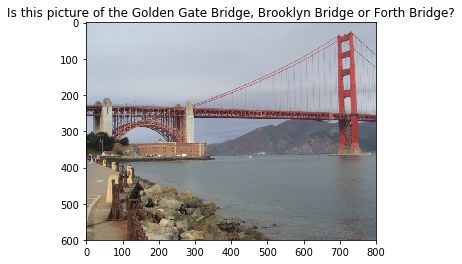

In [27]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions
    img = Image.open(img_path)
    plt.figure()
    plt.imshow(img)
    title = "Is this picture of the " + ", ".join(predicted_landmarks[:-1]) + \
            " or " + predicted_landmarks[-1] + "?"
    plt.title(title)

# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ *The model performed well :) because it is possible to see from the predictions that the model was able to identify that the image contains a bridge (for the Golden Gate Bridge) and his main prediction was the correct label. On the other hand, the model did not perform well in the case of the Great Wall of China, but the predictions made some sense with the elements being presented in the image.*

*Points for improvement:*
* __Data Augmentation__: Perhaps by adding a greater variety of augmentations the algorithm can better generalize what it is learning. Transformations such as changing the brightness, contrast, saturation and hue of an image, or different dimensions for the image are significant points that can improve predictions.

* __Different models__: Study better models to solve this problem.

* __Hyperparameters__: Analyze the best number of epochs, learning rate and loss function.

['images/my_imgs/pisa_tower.jpg', 'images/my_imgs/taj_mahal.jpg', 'images/my_imgs/statue_of_liberty.jpg', 'images/my_imgs/eiffel_tower.jpg', 'images/my_imgs/golden_gate.jpg', 'images/my_imgs/great_wall_of_china.jpg']


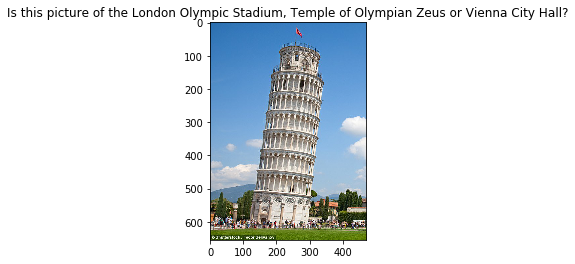

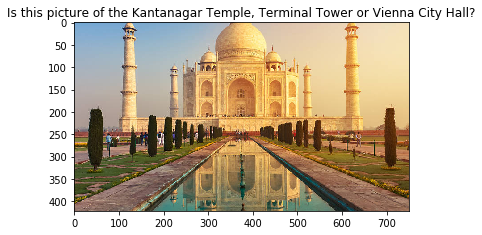

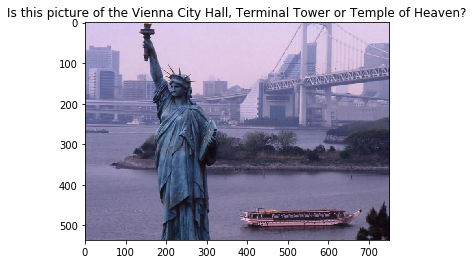

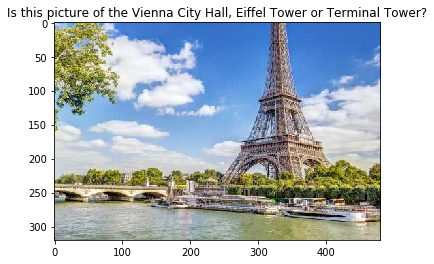

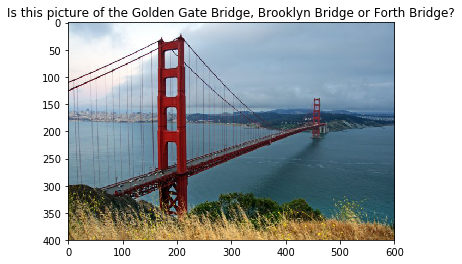

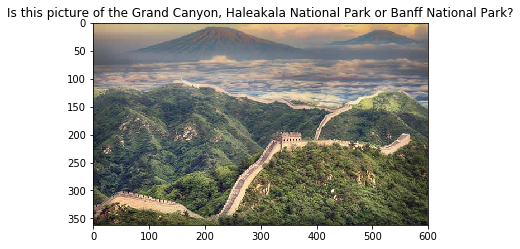

In [28]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.

import os

#  images dir
imgs_path = "images/my_imgs/"
my_imgs = os.listdir(imgs_path)
my_imgs = list(map(lambda path: imgs_path + path, my_imgs))

print(my_imgs)

for img_path in my_imgs:
    suggest_locations(img_path)